# Examen 1

Author:  Ricardo Vallejo


# <font color="RED"> ETAPE 1 </font>

### 1. Téléchargez le contenu de la base de données.

In [720]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

# 1. Téléchargez le contenu de la base de données

data = pd.read_csv("spambase.txt", delimiter='\t')
pd.set_option('display.max_rows', None)
data.head(5)

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,cf_bracket,cf_sqbracket,cf_exclam,cf_dollar,cf_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,status
0,0.00,0.52,0.52,0.0,0.52,0.00,0.0,0.00,0.00,0.0,...,0.192,0.000,0.867,0.000,0.0,2.220,20,131,yes,train
1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.000,0.398,0.000,0.0,1.181,5,26,no,train
2,0.00,0.00,0.66,0.0,0.00,0.66,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.000,0.0,1.142,4,56,no,train
3,0.08,0.00,0.16,0.0,0.00,0.08,0.0,0.08,0.73,0.0,...,0.172,0.057,0.000,0.022,0.0,3.212,44,665,no,train
4,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.000,0.0,1.000,1,3,no,train


In [721]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wf_make                     4601 non-null   float64
 1   wf_address                  4601 non-null   float64
 2   wf_all                      4601 non-null   float64
 3   wf_3d                       4601 non-null   float64
 4   wf_our                      4601 non-null   float64
 5   wf_over                     4601 non-null   float64
 6   wf_remove                   4601 non-null   float64
 7   wf_internet                 4601 non-null   float64
 8   wf_order                    4601 non-null   float64
 9   wf_mail                     4601 non-null   float64
 10  wf_receive                  4601 non-null   float64
 11  wf_will                     4601 non-null   float64
 12  wf_people                   4601 non-null   float64
 13  wf_report                   4601 

### 2. La base de données est répartis en des données d’entrainement et des données de test décrit par la variable status. 
Formez les deux sousensembles de données spam_train et spam_test correspondant respectivement aux données d’entrainement 
et de test.

In [722]:
from sklearn.model_selection import train_test_split

spam_train = data [data['status'] == 'train']
spam_test = data [data['status'] == 'test']

### Train

In [723]:
spam_train.groupby('status').size()

status
train    3601
dtype: int64

In [724]:
spam_train.groupby('spam').size()

spam
no     2179
yes    1422
dtype: int64

### Test

In [725]:
spam_test.groupby('status').size()

status
test    1000
dtype: int64

In [726]:
spam_test.groupby('spam').size()

spam
no     609
yes    391
dtype: int64

### 3. Réalisez une standardisation des deux sous-ensembles des données

In [727]:
Y_train = spam_train['spam'].copy()
Y_test = spam_test['spam'].copy()


In [728]:

X_train = spam_train.copy()
X_train.drop(columns=['spam', 'status'],inplace=True)

X_test = spam_test.copy()
X_test.drop(columns=['spam', 'status'],inplace=True)



In [729]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 4. Déterminez la taille des deux sous-ensembles de données

In [733]:
X_train_scaled.shape[0]

3601

In [734]:
X_train.head(5)

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,wf_conference,cf_comma,cf_bracket,cf_sqbracket,cf_exclam,cf_dollar,cf_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.52,0.52,0.0,0.52,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.192,0.000,0.867,0.000,0.0,2.220,20,131
1,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.000,0.000,0.398,0.000,0.0,1.181,5,26
2,0.00,0.00,0.66,0.0,0.00,0.66,0.0,0.00,0.00,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.142,4,56
3,0.08,0.00,0.16,0.0,0.00,0.08,0.0,0.08,0.73,0.0,...,0.0,0.126,0.172,0.057,0.000,0.022,0.0,3.212,44,665
4,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,3


In [735]:
Xtest_scaled.shape[0]

1000

### 5. A l’aide d’un diagramme de dispersion de paires de variables par classes(spam), représentez la dispersion des 6 premières variables.

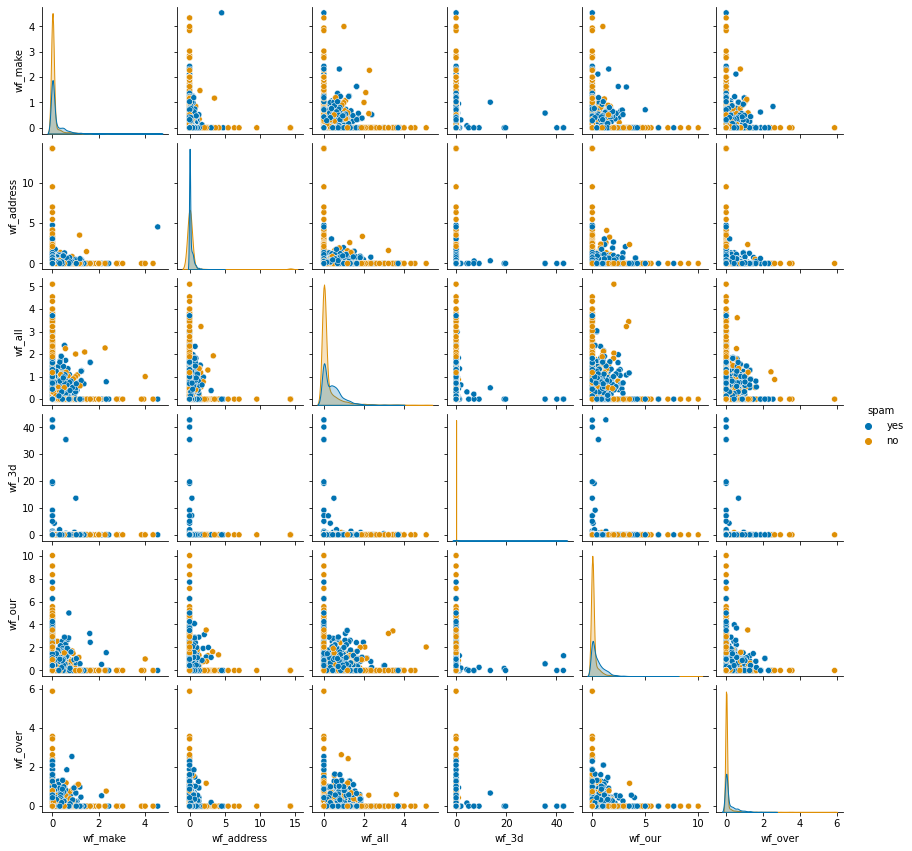

In [736]:
import seaborn as sns

sns.pairplot(data[['wf_make', 'wf_address', 'wf_all', 'wf_3d', 'wf_our', 'wf_over', 'spam']], hue="spam", height = 2, palette = 'colorblind');
plt.show()

### 6. Pourriez-vous extraire des informations préliminaires sur l’importance (pouvoir discriminant) de ces variables.


### Variance analysis

In [737]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

selector = VarianceThreshold()
X_train_tresholding = selector.fit_transform(X_train_normalized)



In [738]:
for feature in zip(X_train.columns, selector.variances_):
    print(feature)



('wf_make', 0.004718341613622874)
('wf_address', 0.008130358168420415)
('wf_all', 0.012403316961795134)
('wf_3d', 0.0013553213486540562)
('wf_our', 0.004638514404612068)
('wf_over', 0.0022897450899374825)
('wf_remove', 0.003034228128992952)
('wf_internet', 0.0013695089694166507)
('wf_order', 0.0030892537544808985)
('wf_mail', 0.001418429769274331)
('wf_receive', 0.005940547828407872)
('wf_will', 0.007553570187653603)
('wf_people', 0.0030583617822914464)
('wf_report', 0.003312861958250526)
('wf_addresses', 0.0034905149972525203)
('wf_free', 0.0015726926738468849)
('wf_business', 0.003791793707898605)
('wf_email', 0.0035767902375616364)
('wf_you', 0.015071706886903043)
('wf_credit', 0.005224380597197364)
('wf_your', 0.011970933496794497)
('wf_font', 0.003232902705762778)
('wf_000', 0.00440555965112882)
('wf_money', 0.00206134093914658)
('wf_hp', 0.0071796006763944105)
('wf_hpl', 0.0027689504348233683)
('wf_lab', 0.0019040738927319245)
('wf_labs', 0.009377631726708153)
('wf_telnet', 0.006

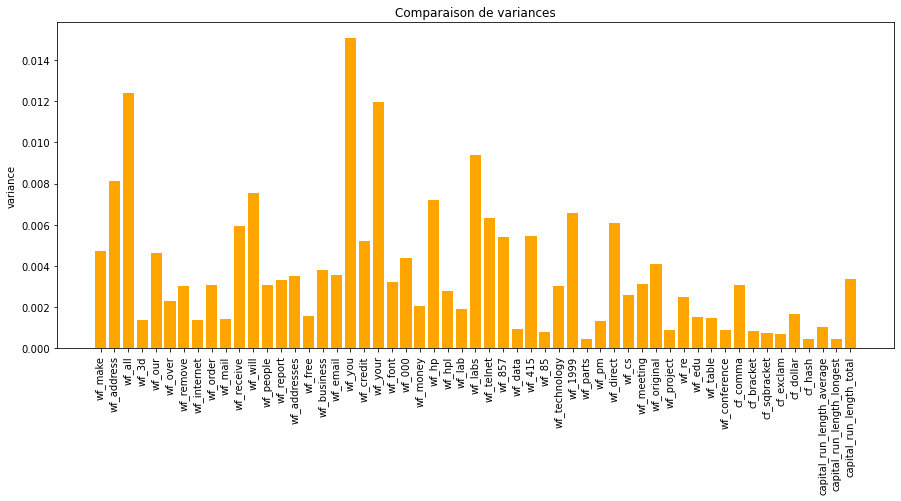

In [739]:

plt.figure(figsize=(15, 6))
plt.bar(x=X_train.columns, height=selector.variances_, color='orange')
plt.xticks(rotation='vertical')
plt.ylabel('variance')
plt.title('Comparaison de variances')
plt.show()

Les 5 variables plus informatives:

    - 'wf_you', 0.015071706886903043
    - 'wf_your', 0.011970933496794497
    - 'wf_all', 0.012403316961795134
    - 'wf_labs', 0.009377631726708153
    - 'wf_address', 0.008130358168420415
    
- Pas de variables avec grande représentation parmis las autres en tante que valeur d information donné.
    

### Correlation

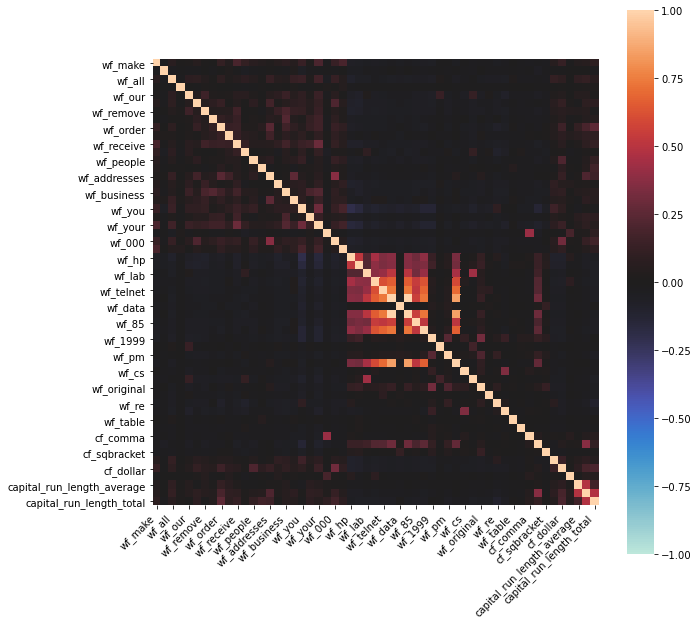

In [741]:
matrice_correlation = data.corr().round(2)
# print(matrice_correlation)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(matrice_correlation, vmin=-1, vmax=1, center=0, square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Une confirmation de bas correlation entre variables, mais il semble interessante wf_labs, wf_hp, wf_data et et wf_technologie pour la forte correlation entre eaux, peut avoir redundace d information.

# <font color="RED"> ETAPE 2 </font>

On désire développer un modèle régression logistique qui permet de détecter les spams.

### 1. Réalisez un encodage de la variable cible en vue d’une régression logistique

In [742]:
Y_train = pd.DataFrame (Y_train, columns= ['spam'])
Y_train['spam'] = np.where(Y_train['spam'] == 'yes', 1, 0)
Y_test = pd.DataFrame (Y_test, columns= ['spam'])
Y_test['spam'] = np.where(Y_test['spam'] == 'yes', 1, 0)

In [743]:
Y_train.head(5)

,spam
0,1
1,0
2,0
3,0
4,0


### 2. Représentez la dispersion de la variable cible (spam) encodée en fonction de la variable wf_cs.

In [744]:
data[['wf_cs']].describe()

,wf_cs
count,4601.000000
mean,0.043667
std,0.361205
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.140000


<Figure size 432x288 with 0 Axes>

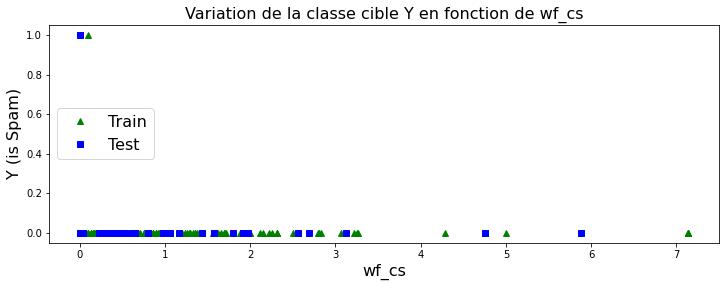

In [745]:
fig = plt.figure()
plt.figure(figsize=(12, 4))

plt.plot(X_train['wf_cs'], Y_train['spam'], "g^", label='Train')
plt.plot(X_test['wf_cs'], Y_test['spam'], "bs", label='Test')
plt.ylabel("Y (is Spam)", fontsize=16)
plt.xlabel("wf_cs", fontsize=16)
plt.legend(loc="center left", fontsize=16)
plt.title("Variation de la classe cible Y en fonction de wf_cs", fontsize=16)

plt.show()

En relation a la variable  wf_cs, cest un variable de bas variance, en tante que diversite de donnes est bas la representation des donnes SPAM.

### 3. En considérant la variable wf_cs, entrainez un modèle de régression logistique sur l’ensemble des données d’entrainement.

In [746]:
X_train_normalized =  pd.DataFrame( X_train_normalized,columns=X_train.columns)
X_train_normalized.head(5)

X_test_normalized =  pd.DataFrame( X_test_normalized,columns=X_test.columns)
X_test_normalized.head(5)

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,wf_conference,cf_comma,cf_bracket,cf_sqbracket,cf_exclam,cf_dollar,cf_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.000000,0.056723,0.000000,0.0,0.284314,0.000000,0.0,0.100756,0.000000,0.257447,...,0.0,0.000000,0.000000,0.0,0.000000,0.051321,0.000000,0.006519,0.021941,0.010354
1,0.087558,0.032213,0.060784,0.0,0.021008,0.014286,0.0,0.047859,0.273585,0.140426,...,0.0,0.001433,0.045206,0.0,0.061686,0.098868,0.010435,0.015423,0.080452,0.140476
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000770,0.001330,0.002020
3,0.000000,0.000000,0.196078,0.0,0.140056,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.302534,0.0,0.261138,0.000000,0.023155,0.000000,0.000000,0.002147
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.237320,0.000000,0.000000,0.056506,0.111702,0.011238


In [747]:
Y_train =  pd.DataFrame(Y_train, columns=['spam'])
Y_train.head(5)

,spam
0,1
1,0
2,0
3,0
4,0


In [759]:
#Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,solver="lbfgs", random_state=42)

model.fit(np.array(X_train_normalized[['wf_cs']]).reshape(-1,1), np.array(Y_train).ravel()) #Training the model


LogisticRegression(max_iter=1000, random_state=42)

In [760]:

Y_pred=model.predict(X_test_normalized[['wf_cs']])



In [761]:
train_acc = model.score(np.array(X_train_normalized[['wf_cs']]).reshape(-1,1), np.array(Y_train['spam']).ravel())
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 60.5109691752291


[[609   0]
 [391   0]]


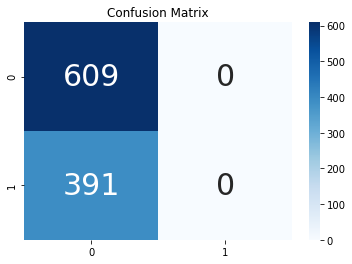

In [762]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

df_cm = cm
ax = plt.axes()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

 - Tres mauvaise classificateur, aucune spam a été bien detecte.

### 3.1 Ameloirer le modele avec tous les descripteurs

In [763]:
#Train the model
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter=1000,solver="lbfgs", C=10, random_state=42)

model2.fit(X_train_normalized, np.array(Y_train).ravel()) #Training the model


LogisticRegression(C=10, max_iter=1000, random_state=42)

In [764]:

Y_pred=model2.predict(X_test_normalized)



In [765]:
train_acc = model2.score(X_train_normalized, np.array(Y_train['spam']).ravel())
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 91.16911968897529


[[568  41]
 [ 50 341]]


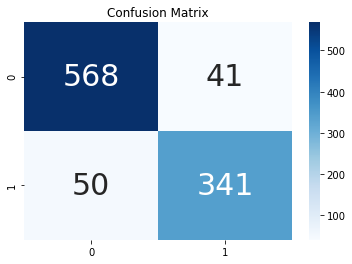

In [766]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

df_cm = cm
ax = plt.axes()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

-  Classificateur de meilleur qualite, mais cette modele classifique comme SPAM encore plusiyrs email non spam.  

-  La precision est ameliore, parce que ilya petit taux de missclasifiction de SPAM (1)

### 4. Déterminez les paramètres du modèle.

In [767]:
model.coef_

array([[-3.68401239]])

In [768]:
model.intercept_

array([-0.40971398])

### 5. Représentez la frontière de décision.

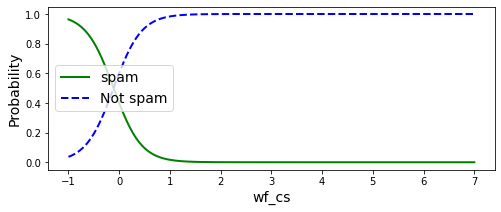

In [770]:
X_new = np.linspace(-1, 7, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="spam")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not spam")
plt.xlabel("wf_cs", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)

 - Pour tout valeur de wf_cs on a un reponse de NOT SPAM
 - Pas bonne modele en prennant une seul variable 
 - Amelioerer le modele en prennant plus de descriptores.
 - La variable a bas de variance et correlation.

# <font color="RED"> ETAPE 3 </font>

### 1. En utilisant la libraire Sklearn, développez un perceptron simple pour prédire la classe (spam) (random_state=100, max_iter = 1500).

In [771]:
Y_train.groupby('spam').size()

spam
0    2179
1    1422
dtype: int64

In [772]:
Y_test.groupby('spam').size()

spam
0    609
1    391
dtype: int64

In [773]:
from sklearn.linear_model import Perceptron
# instantiate the model
modelPerceptron = Perceptron (max_iter=1500, random_state=100)
# fit the model with data
results1 = modelPerceptron.fit(X_train_normalized,np.array(Y_train).ravel())



In [774]:
train_acc = modelPerceptron.score(X_train_normalized, Y_train['spam'])
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 81.75506803665648


In [775]:
Y_pred=modelPerceptron.predict(X_test_normalized)

### 2. Représentez la matrice de confusion et évaluez les performances. Déterminez la valeur du score F1

[[591  18]
 [ 91 300]]


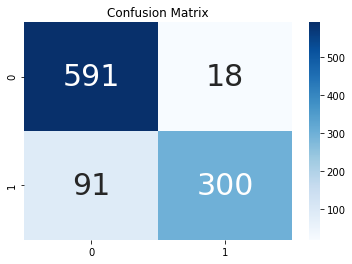

In [776]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

df_cm = cm
ax = plt.axes()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [777]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_pred) )

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       609
           1       0.94      0.77      0.85       391

    accuracy                           0.89      1000
   macro avg       0.90      0.87      0.88      1000
weighted avg       0.90      0.89      0.89      1000



Le f1_score pour SPAM est 0.85

### 3. Quelle est la valeur du biais du modèle de perceptron obtenu ?

In [778]:
modelPerceptron.intercept_  # Valor de bias

array([-2.])

In [779]:
modelPerceptron.coef_

array([[ 0.20044053, -0.08403361,  0.4185022 ,  3.96612941,  1.797     ,
         1.42857143,  6.65887208,  2.83348335,  1.08555133,  1.18976898,
         0.83908046, -0.28955533, -0.32072072,  0.15039062,  1.29931973,
         6.5335    ,  3.87254902,  0.46314631,  1.39355742,  1.17088608,
         2.13591359,  3.09473684,  4.18899083,  1.73948718, -9.87566011,
        -3.98859544, -5.45728291,  0.29411765, -1.76680672, -0.96848739,
        -4.44334433, -0.92647059, -2.7415    ,  2.10923277, -0.44950495,
        -0.98079232, -2.60846085, -1.09243697, -4.72268908, -6.91806723,
        -1.6022409 , -5.0295    , -6.42203548, -7.33061224, -0.75576037,
        -4.879     , -2.34367161,  1.00687039, -0.20754717,  5.78644005,
        12.33783108,  2.55111201,  2.09751702,  5.25660793,  4.97207037]])

### 4. Combien de paramètres possède ce modèle. Pourquoi ?


Ils sont 55 parametres.  55 (0 to 54) correspondant aux poids et 1 au bias.

- y = f(Wx +  b)

- Le vector de poids a 55 elements, une pour chaque variable retenu dans le modele.

### 5. En se basant sur les poids synaptique, réalisez un ordonnancement de l’importance des caractéristiques. Justifiez la faisabilité de l’ordonnancement des caractéristiques à partir des poids synaptiques.

In [781]:
poids['w'] = pd.DataFrame (modelPerceptron.coef_.ravel(), columns= ['w'])
poids['var'] = pd.DataFrame (X_train.columns, columns= ['var'])
poids.sort_values(by='w', ascending=False)

,var,w
50,cf_dollar,12.337831
6,wf_remove,6.658872
15,wf_free,6.533500
49,cf_exclam,5.786440
53,capital_run_length_longest,5.256608
54,capital_run_length_total,4.972070
22,wf_000,4.188991
3,wf_3d,3.966129
16,wf_business,3.872549
21,wf_font,3.094737


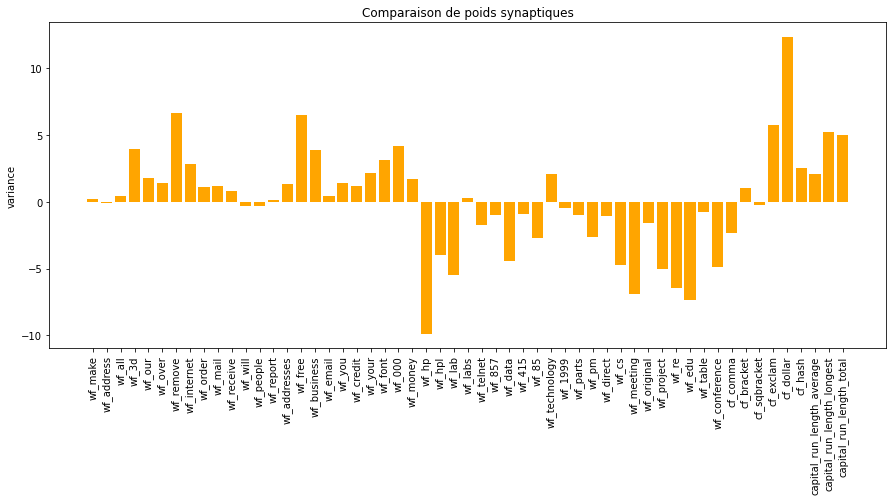

In [782]:
plt.figure(figsize=(15, 6))
plt.bar(x=X_train.columns, height=poids['w'], color='orange')
plt.xticks(rotation='vertical')
plt.ylabel('variance')
plt.title('Comparaison de poids synaptiques')


plt.show()

Le poids synaptique et la variance de chaque variable ne sont pas directement relies. 

- Je ne devrait reduire des variables basse sur le poids synaptique.
- Le poids synaptique plus grande ne sont pas relies aux haut % de variance ou information relevante.

### 7. En utilisant la libraire Sklearn, développez un perceptron multicouche (hidden_layer_sizes=(2),activation=’logistic’,random_state=100 ,max_iter=1500).

In [783]:
Y_train.head(3)

,spam
0,1
1,0
2,0


In [791]:
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(2), solver='sgd', activation='logistic', 
                    max_iter=1500, random_state=100)
# Train the model
results2 = mlp.fit(X_train_normalized, np.array(Y_train).ravel())

Y_pred = mlp.predict(X_test_normalized)



### 8. Représentez la matrice de confusion et évaluez les performances.

In [792]:
# Score 
score = mlp.score(X_test_normalized,Y_test)
print(score)

0.609


[[609   0]
 [391   0]]


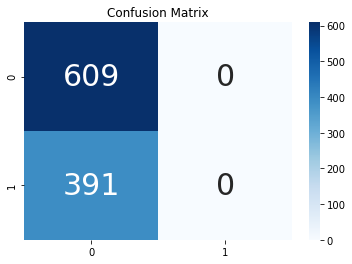

In [793]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

df_cm = cm
ax = plt.axes()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [794]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_pred) )

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       609
           1       0.00      0.00      0.00       391

    accuracy                           0.61      1000
   macro avg       0.30      0.50      0.38      1000
weighted avg       0.37      0.61      0.46      1000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9. Comparez les performances du perceptron simple avec le perceptron multi-couche.


- Il a une meilleur performance avec le perceptron simple que le perceptron multicouche, 
una diferencia en score de 69% a 85%.   

- Le parametre hidden_layer_sizes=(2) est erronee

### 10. Sur un même graphique, représentez la variation de la fonction perte du perceptron multicouche en fonction du nombre d’itérations sur les deux sous-ensembles de données spam_train et spam_test. Commentez le graphique. 


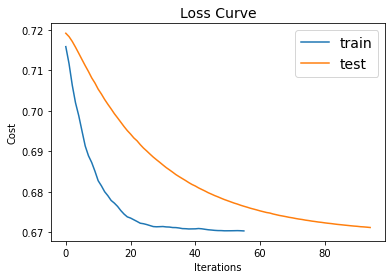

In [795]:
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(2), solver='sgd', activation='logistic', 
                    max_iter=1500, random_state=100)

results2 = mlp.fit(X_train_normalized, np.array(Y_train).ravel())
plt.plot(results2.loss_curve_, label = 'train')
results3 = mlp.fit(X_test_normalized, np.array(Y_test).ravel())
plt.plot(results3.loss_curve_, label = 'test')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc="upper right", fontsize=14)
plt.show()

- En utilisant le set de train,  le algorithme converge plus raplidement, apres 30 iterations, on obtiens similaires resultats que dans 100 iterations avec le test set.

- Les deux algorithmes convergent, mais avec Loss importante.
